In [1]:
#module imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#SCIPY
from scipy.stats import norm

In [3]:
# Given values
S_t = 1.20  # Spot price in dollars
r = 0.02  # Risk-free rate (2%)
d = 0.01  # Storage cost (1%)
T = 0.5  # Time to maturity in years

# Calculating futures price
F_t = S_t * np.exp((r + d) * T)
print(f"The fair price of the coffee futures contract is ${F_t:.3f} per pound.")

The fair price of the coffee futures contract is $1.218 per pound.


In [5]:
# Given values
S_0 = 1.20  # Spot price in dollars
X = 1.25  # Strike price in dollars
r = 0.02  # Risk-free rate (2%)
T = 0.5  # Time to maturity in years
sigma = 0.25  # Volatility (25%)

# Calculating d1 and d2
d1 = (np.log(S_0 / X) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Calculating call option price using Black-Scholes formula
C = S_0 * norm.cdf(d1) - X * np.exp(-r * T) * norm.cdf(d2)
print(f"The price of the call option is ${C:.3f}.")


The price of the call option is $0.068.


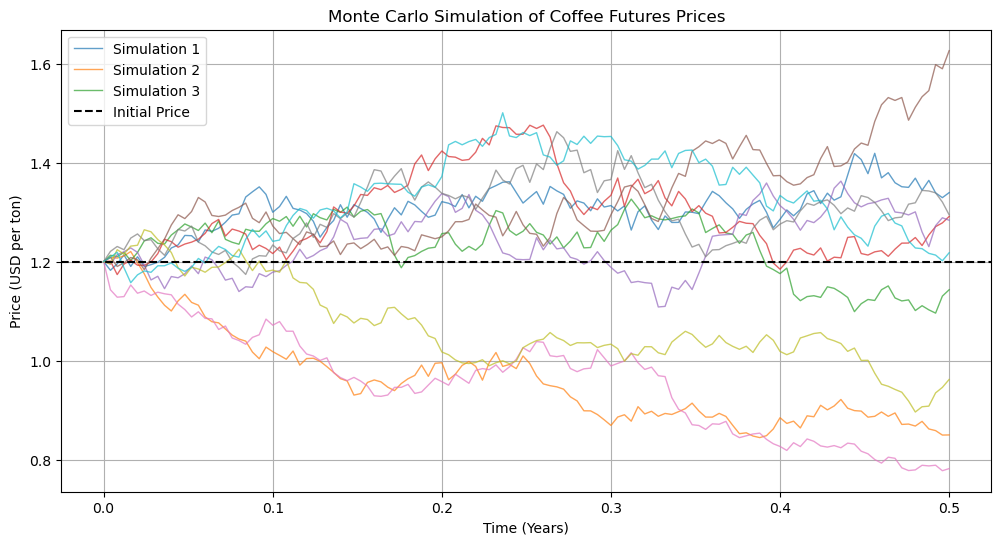

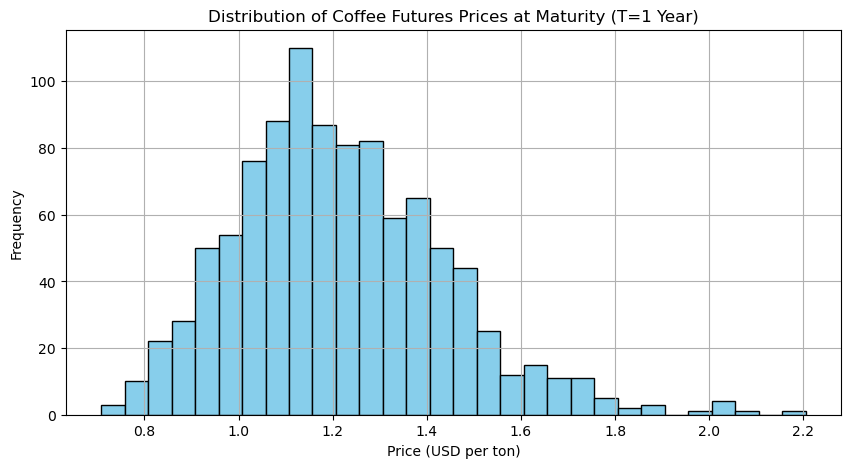

In [7]:
def monte_carlo_simulation(S0, mu, sigma, T, N, num_simulations):
    """
    Monte Carlo simulation for coffee futures prices using Geometric Brownian Motion.

    Parameters:
    S0: float - Initial price of coffee (e.g., $ per ton)
    mu: float - Annual drift (expected return)
    sigma: float - Annual volatility
    T: float - Time horizon in years (e.g., 1 year)
    N: int - Number of time steps (e.g., 252 trading days)
    num_simulations: int - Number of simulations to run

    Returns:
    simulations: numpy.ndarray - Simulated price paths
    time_grid: numpy.ndarray - Time steps
    """

    dt = T /  N  # Time step size
    time_grid = np.linspace(0, T, N)  # Time grid

    # Initialize simulations matrix
    simulations = np.zeros((num_simulations, N))
    simulations[:, 0] = S0  # Set initial price

    # Generate simulations
    for i in range(num_simulations):
        for t in range(1, N):
            dW = np.random.normal(0, np.sqrt(dt))  # Brownian motion increment
            simulations[i, t] = simulations[i, t - 1] * np.exp((mu - 0.5 * sigma**2) * dt + sigma * dW)

    return simulations, time_grid

# Parameters
 
S0 = 1.20  # Initial coffee price ($ per ton)
mu = 0.02  # Annual drift (2%)
sigma = 0.25  # Annual volatility (25%)
T = 0.5  # Time horizon (6 months, in years)
N = int(252*0.5)  # Trading days in 6 months
num_simulations = 1000  # Number of simulations

# Run Monte Carlo simulation
simulations, time_grid = monte_carlo_simulation(S0, mu, sigma, T, N, num_simulations)

# Plot the first few simulations
plt.figure(figsize=(12, 6))
for i in range(10):  # Plot first 10 simulations
    plt.plot(time_grid, simulations[i], lw=1, alpha=0.7, label=f"Simulation {i+1}" if i < 3 else None)
plt.title("Monte Carlo Simulation of Coffee Futures Prices")
plt.xlabel("Time (Years)")
plt.ylabel("Price (USD per ton)")
plt.axhline(S0, color="black", linestyle="--", label="Initial Price")
plt.legend(loc="upper left")
plt.grid()
plt.show()

# Analyze final prices at maturity
final_prices = simulations[:, -1]
plt.figure(figsize=(10, 5))
plt.hist(final_prices, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Coffee Futures Prices at Maturity (T=1 Year)")
plt.xlabel("Price (USD per ton)")
plt.ylabel("Frequency")
plt.grid()
plt.show()